In [1]:
%pip install pandas-ta

Note: you may need to restart the kernel to use updated packages.
     ------------------------------------ 115.1/115.1 kB 743.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218924 sha256=d849649fe52bda4b564af06705409ffe12a774ea2d726e61a048b26a52342c5a
  Stored in directory: c:\users\vishal\appdata\local\pip\cache\wheels\18\cc\8f\61745c2f312ffd85e449ae8fa9e85f5442fe63196c2e89fa14
Successfully built pandas-ta


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid")

In [3]:
start_date = "2012-12-31"
end_date = "2023-12-31"

In [58]:
data = {}

ticker = yf.Ticker("NVDA")

data['High'] = ticker.history(start = start_date, end = end_date)['High']
data['Low'] = ticker.history(start = start_date, end = end_date)['Low']
data['Close'] = ticker.history(start = start_date, end = end_date)['Close']
data['Volume'] = ticker.history(start = start_date, end = end_date)['Volume']

data = pd.DataFrame(data)

data.head()

,High,Low,Close,Volume
Date,,,,
2012-12-31 00:00:00-05:00,0.284098,0.277636,0.282944,326460000
2013-01-02 00:00:00-05:00,0.293791,0.288713,0.293560,478836000
2013-01-03 00:00:00-05:00,0.297022,0.290329,0.293791,298888000
2013-01-04 00:00:00-05:00,0.304407,0.293329,0.303484,524968000
2013-01-07 00:00:00-05:00,0.304176,0.292637,0.294714,610732000


In [59]:
import pandas_ta as ta
data['RSI'] = ta.rsi(data.Close, length=14)
data['CCI'] = ta.cci(data.High, data.Low, data.Close, length=14)
data['VWAP'] = ta.vwap(data.High, data.Low, data.Close, data.Volume)
rsi_signal = []
for rsi in data['RSI']:
    if rsi > 70:
        rsi_signal.append(-1)
    elif rsi < 30:
        rsi_signal.append(1)
    else:
        rsi_signal.append(0)
data['RSI_signal'] = rsi_signal
cci_signal = []
for cci in data['CCI']:
    if cci > 100:
        cci_signal.append(-1)
    elif cci < -100:
        cci_signal.append(1)
    else:
        cci_signal.append(0)

data['CCI_signal'] = cci_signal

C:\Users\Vishal\AppData\Local\Temp\ipykernel_25960\3891391108.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['VWAP'] = ta.vwap(data.High, data.Low, data.Close, data.Volume)


In [60]:
data['ROC'] = ta.roc(data.Close, length=14)

# Generate ROC signals
roc_signal = []
for roc in data['ROC']:
    if roc > 0:
        roc_signal.append(1)  # Buy signal
    elif roc < 0:
        roc_signal.append(-1)  # Sell signal
    else:
        roc_signal.append(0)  # No signal

data['ROC_signal'] = roc_signal

In [61]:
data.head(5)

,High,Low,Close,Volume,RSI,CCI,VWAP,RSI_signal,CCI_signal,ROC,ROC_signal
Date,,,,,,,,,,,
2012-12-31 00:00:00-05:00,0.284098,0.277636,0.282944,326460000,NaN,NaN,0.281559,0,0,NaN,0
2013-01-02 00:00:00-05:00,0.293791,0.288713,0.293560,478836000,NaN,NaN,0.292021,0,0,NaN,0
2013-01-03 00:00:00-05:00,0.297022,0.290329,0.293791,298888000,NaN,NaN,0.293714,0,0,NaN,0
2013-01-04 00:00:00-05:00,0.304407,0.293329,0.303484,524968000,NaN,NaN,0.300407,0,0,NaN,0
2013-01-07 00:00:00-05:00,0.304176,0.292637,0.294714,610732000,NaN,NaN,0.297176,0,0,NaN,0


In [62]:
data['TargetNextClose'] = data['Close'].shift(-1)
data.dropna(inplace = True)
data.reset_index(inplace = True)

data.head()

,Date,High,Low,Close,Volume,RSI,CCI,VWAP,RSI_signal,CCI_signal,ROC,ROC_signal,TargetNextClose
0,2013-01-22 00:00:00-05:00,0.283175,0.278097,0.279482,308224000,43.084882,-59.246235,0.280251,0,0,-1.223486,-1,0.279944
1,2013-01-23 00:00:00-05:00,0.280636,0.276943,0.279944,421808000,43.946976,-64.551428,0.279174,0,0,-4.638355,-1,0.281328
2,2013-01-24 00:00:00-05:00,0.282482,0.277636,0.281328,396980000,46.561667,-45.185777,0.280482,0,0,-4.241944,-1,0.286406
3,2013-01-25 00:00:00-05:00,0.286636,0.280405,0.286406,393920000,54.873684,30.153503,0.284482,0,0,-5.627383,-1,0.291021
4,2013-01-28 00:00:00-05:00,0.292868,0.287098,0.291021,422492000,60.837423,180.118954,0.290329,0,-1,-1.252973,-1,0.284790


In [63]:
date_range = data['Date']

In [64]:
data_set = data.iloc[:, 1:13]


In [65]:
data

,Date,High,Low,Close,Volume,RSI,CCI,VWAP,RSI_signal,CCI_signal,ROC,ROC_signal,TargetNextClose
0,2013-01-22 00:00:00-05:00,0.283175,0.278097,0.279482,308224000,43.084882,-59.246235,0.280251,0,0,-1.223486,-1,0.279944
1,2013-01-23 00:00:00-05:00,0.280636,0.276943,0.279944,421808000,43.946976,-64.551428,0.279174,0,0,-4.638355,-1,0.281328
2,2013-01-24 00:00:00-05:00,0.282482,0.277636,0.281328,396980000,46.561667,-45.185777,0.280482,0,0,-4.241944,-1,0.286406
3,2013-01-25 00:00:00-05:00,0.286636,0.280405,0.286406,393920000,54.873684,30.153503,0.284482,0,0,-5.627383,-1,0.291021
4,2013-01-28 00:00:00-05:00,0.292868,0.287098,0.291021,422492000,60.837423,180.118954,0.290329,0,-1,-1.252973,-1,0.284790
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2749,2023-12-21 00:00:00-05:00,49.088667,48.412751,48.983681,300425000,56.175523,66.166841,48.828366,0,0,4.767053,1,48.823704
2750,2023-12-22 00:00:00-05:00,49.376630,48.460748,48.823704,252507000,55.352142,60.957553,48.887027,0,0,7.304556,1,49.272640
2751,2023-12-26 00:00:00-05:00,49.593598,48.953681,49.272640,244200000,57.245979,76.808756,49.273306,0,0,5.826140,1,49.410622
2752,2023-12-27 00:00:00-05:00,49.673588,49.078664,49.410622,233648000,57.837928,75.632199,49.387625,0,0,8.601629,1,49.515610


In [66]:
data_set

,High,Low,Close,Volume,RSI,CCI,VWAP,RSI_signal,CCI_signal,ROC,ROC_signal,TargetNextClose
0,0.283175,0.278097,0.279482,308224000,43.084882,-59.246235,0.280251,0,0,-1.223486,-1,0.279944
1,0.280636,0.276943,0.279944,421808000,43.946976,-64.551428,0.279174,0,0,-4.638355,-1,0.281328
2,0.282482,0.277636,0.281328,396980000,46.561667,-45.185777,0.280482,0,0,-4.241944,-1,0.286406
3,0.286636,0.280405,0.286406,393920000,54.873684,30.153503,0.284482,0,0,-5.627383,-1,0.291021
4,0.292868,0.287098,0.291021,422492000,60.837423,180.118954,0.290329,0,-1,-1.252973,-1,0.284790
...,...,...,...,...,...,...,...,...,...,...,...,...
2749,49.088667,48.412751,48.983681,300425000,56.175523,66.166841,48.828366,0,0,4.767053,1,48.823704
2750,49.376630,48.460748,48.823704,252507000,55.352142,60.957553,48.887027,0,0,7.304556,1,49.272640
2751,49.593598,48.953681,49.272640,244200000,57.245979,76.808756,49.273306,0,0,5.826140,1,49.410622
2752,49.673588,49.078664,49.410622,233648000,57.837928,75.632199,49.387625,0,0,8.601629,1,49.515610


In [67]:
data_set.drop(columns=['RSI', 'CCI', 'ROC', 'High', 'Low'], inplace = True)

In [68]:
data_set.head(30)

,Close,Volume,VWAP,RSI_signal,CCI_signal,ROC_signal,TargetNextClose
0,0.279482,308224000,0.280251,0,0,-1,0.279944
1,0.279944,421808000,0.279174,0,0,-1,0.281328
2,0.281328,396980000,0.280482,0,0,-1,0.286406
3,0.286406,393920000,0.284482,0,0,-1,0.291021
4,0.291021,422492000,0.290329,0,-1,-1,0.284790
5,0.284790,388872000,0.286329,0,-1,-1,0.284328
6,0.284328,287592000,0.285559,0,0,1,0.282944
7,0.282944,470544000,0.283867,0,0,1,0.285482
8,0.285482,288816000,0.284944,0,0,1,0.280636
9,0.280636,511744000,0.283559,0,0,-1,0.287098


In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler_feature_train = MinMaxScaler(feature_range = (0, 1))
scaler_feature_test = MinMaxScaler(feature_range = (0, 1))
scaler_target_train = MinMaxScaler(feature_range = (0, 1))
scaler_target_test = MinMaxScaler(feature_range = (0, 1))

feature_set = data_set.drop(['TargetNextClose'], axis = 1)

target_set = np.array(data_set['TargetNextClose']).reshape(-1, 1)


In [70]:
splitlimit = int(len(feature_set) * 0.8)

feature_set_train, feature_set_test = feature_set[:splitlimit], feature_set[splitlimit:]
feature_set_train_scaled = scaler_feature_train.fit_transform(feature_set_train)
feature_set_test_scaled = scaler_feature_test.fit_transform(feature_set_test)

target_set_train, target_set_test = target_set[:splitlimit], target_set[splitlimit:]
target_set_train_scaled = scaler_target_train.fit_transform(target_set_train)
target_set_test_scaled = scaler_target_test.fit_transform(target_set_test)

In [71]:
X_train = []

backcandles = 14
features = 6

for i in range(features):
    X_train.append([])

    for j in range(backcandles, feature_set_train_scaled.shape[0]):
        X_train[i].append(feature_set_train_scaled[j-backcandles: j, i])

X_train = np.moveaxis(X_train, [0], [2])

X_test = []

for i in range(features):
    X_test.append([])

    for j in range(backcandles, feature_set_test_scaled.shape[0]):
        X_test[i].append(feature_set_test_scaled[j-backcandles: j, i])

X_test = np.moveaxis(X_test, [0], [2])

X_train, X_test = np.array(X_train), np.array(X_test)
Yi, Yj = np.array(target_set_train_scaled[backcandles:]), np.array(target_set_test_scaled[backcandles:]),
Y_train, Y_test = np.reshape(Yi, (len(Yi), 1)), np.reshape(Yj, (len(Yj), 1))

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2189, 14, 6)
(537, 14, 6)
(2189, 1)
(537, 1)


In [72]:
import tensorflow as tf
import keras

lstm_input = keras.layers.Input(shape = (backcandles, features), name = 'lstm_input')
lstm1 = keras.layers.LSTM(100, return_sequences = True)(lstm_input)
lstm2 = keras.layers.LSTM(75)(lstm1)
dense = keras.layers.Dense(1)(lstm2)
out = keras.layers.Activation('linear', name = 'output')(dense)

model = keras.models.Model(inputs = lstm_input, outputs = out)
adam = keras.optimizers.Adam()

model.compile(optimizer = adam, loss = 'mse', metrics=[tf.keras.metrics.Accuracy()])
model.fit(x = X_train, y = Y_train, batch_size = 15, epochs = 20, shuffle = True)

Epoch 1/20
146/146 [==============================] - 13s 44ms/step - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 2/20
146/146 [==============================] - 5s 37ms/step - loss: 3.3146e-04 - accuracy: 0.0000e+00
Epoch 3/20
146/146 [==============================] - 5s 38ms/step - loss: 3.1612e-04 - accuracy: 0.0000e+00
Epoch 4/20
146/146 [==============================] - 7s 45ms/step - loss: 2.7088e-04 - accuracy: 0.0000e+00
Epoch 5/20
146/146 [==============================] - 6s 39ms/step - loss: 3.1069e-04 - accuracy: 0.0000e+00
Epoch 6/20
146/146 [==============================] - 5s 36ms/step - loss: 3.0909e-04 - accuracy: 0.0000e+00
Epoch 7/20
146/146 [==============================] - 5s 37ms/step - loss: 2.5214e-04 - accuracy: 0.0000e+00
Epoch 8/20
146/146 [==============================] - 5s 37ms/step - loss: 3.0961e-04 - accuracy: 0.0000e+00
Epoch 9/20
146/146 [==============================] - 5s 37ms/step - loss: 2.6776e-04 - accuracy: 0.0000e+00
Epoch 10/20
146/146 [=

In [73]:
Y_pred = model.predict(X_test)


17/17 [==============================] - 2s 15ms/step


In [74]:
Y_test_prices = pd.DataFrame(scaler_target_test.inverse_transform(Y_test), index = date_range[len(date_range)-Y_test.shape[0]:])
Y_pred_prices = pd.DataFrame(scaler_target_test.inverse_transform(Y_pred), index = date_range[len(date_range)-Y_test.shape[0]:])

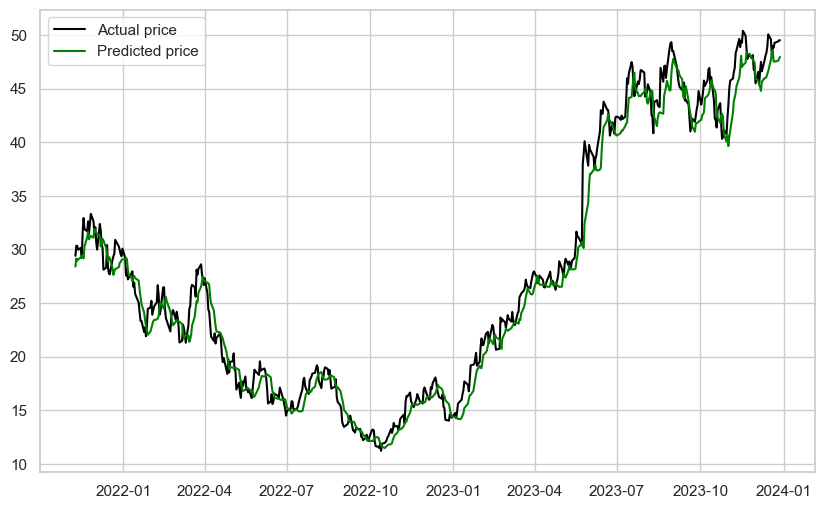

In [75]:
plt.figure(figsize = (10, 6))
plt.plot(Y_test_prices, color = 'black', label = 'Actual price')
plt.plot(Y_pred_prices, color = 'green', label = 'Predicted price')
plt.legend()
plt.show()

In [76]:
def sharpe_ratio(returns, risk_free_rate=0):
    return (returns.mean() - risk_free_rate) / returns.std()

sharpe = sharpe_ratio(Y_pred)
print(f"Sharpe Ratio: {sharpe}")

Sharpe Ratio: 1.3876164912540576


In [77]:
rmse = np.round(np.sqrt(np.mean(((Y_test_prices[0] - Y_pred_prices[0])/Y_test_prices[0])**2)), 3)
print("Root Mean Square Error (RMSE) =", np.round(rmse*100, 3), "%")

Root Mean Square Error (RMSE) = 6.1 %


In [78]:
print("Correlation between actual time series and predicted time series:")
print(np.round(np.corrcoef(Y_test_prices[0], Y_pred_prices[0])[0,1], 3))

Correlation between actual time series and predicted time series:
0.992
